# Advanced Homework 2 

## Required Libraries

In [1]:
# General Libraries
import numpy as np
import pandas as pd 

# Plotting Libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import mglearn 

# Sklearn Libraries 
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline

# Ignoring warnings in the whole notebook
import warnings
warnings.filterwarnings('ignore')

## Task 1: Classification on the 'credit-g' Dataset

In [2]:
# Fetching the Datset using fetch_openml
dataset_credit = fetch_openml('credit-g')

In [3]:
# Concating the Data and Target Column as a whole Dataframe
df_credits = pd.concat([dataset_credit['data'], dataset_credit['target']], axis=1)
df_credits

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12.0,existing paid,furniture/equipment,1736.0,<100,4<=X<7,3.0,female div/dep/mar,none,...,real estate,31.0,none,own,1.0,unskilled resident,1.0,none,yes,good
996,<0,30.0,existing paid,used car,3857.0,<100,1<=X<4,4.0,male div/sep,none,...,life insurance,40.0,none,own,1.0,high qualif/self emp/mgmt,1.0,yes,yes,good
997,no checking,12.0,existing paid,radio/tv,804.0,<100,>=7,4.0,male single,none,...,car,38.0,none,own,1.0,skilled,1.0,none,yes,good
998,<0,45.0,existing paid,radio/tv,1845.0,<100,1<=X<4,4.0,male single,none,...,no known property,23.0,none,for free,1.0,skilled,1.0,yes,yes,bad


In [4]:
# Some Information on the Dataset
df_credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   checking_status         1000 non-null   category
 1   duration                1000 non-null   float64 
 2   credit_history          1000 non-null   category
 3   purpose                 1000 non-null   category
 4   credit_amount           1000 non-null   float64 
 5   savings_status          1000 non-null   category
 6   employment              1000 non-null   category
 7   installment_commitment  1000 non-null   float64 
 8   personal_status         1000 non-null   category
 9   other_parties           1000 non-null   category
 10  residence_since         1000 non-null   float64 
 11  property_magnitude      1000 non-null   category
 12  age                     1000 non-null   float64 
 13  other_payment_plans     1000 non-null   category
 14  housing                 1

In [5]:
# Some Additional Information on the DataFrame
df_credits.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


### 1.1) Determine which features are continuous and which are categorical.


In [6]:
# Selecting numerical features from the dataset
num_look_feats = df_credits.select_dtypes(np.number).columns.tolist()
print('NUMERICAL FEATURES: \n')
num_look_feats

NUMERICAL FEATURES: 



['duration',
 'credit_amount',
 'installment_commitment',
 'residence_since',
 'age',
 'existing_credits',
 'num_dependents']

**However, here all features are not numerical but they are categorical features like `installment commitment` , `residence_since`, `existing_credits` , `num_dependents`** 

In [7]:
# THE ACTUAL MNUMERICAL FEATURES
real_num_feats = [
    'duration',
    'credit_amount',
    'age'
]

In [8]:
# Other columns except the Real Num Features are all categorical including other 4 mentioned above
cat_feats = list((set(df_credits.columns) - set(real_num_feats)))
print('CATEGORICAL FEATURES: \n')
cat_feats

CATEGORICAL FEATURES: 



['personal_status',
 'employment',
 'class',
 'num_dependents',
 'credit_history',
 'other_parties',
 'residence_since',
 'checking_status',
 'foreign_worker',
 'own_telephone',
 'savings_status',
 'other_payment_plans',
 'installment_commitment',
 'job',
 'property_magnitude',
 'purpose',
 'existing_credits',
 'housing']

In [9]:
# Checking for Null Values
df_credits.isna().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

### 1.2) Visualize the univariate distribution of each continuous feature, and the distribution of the target.

In [10]:
# Setting a style
sns.set_style('darkgrid')

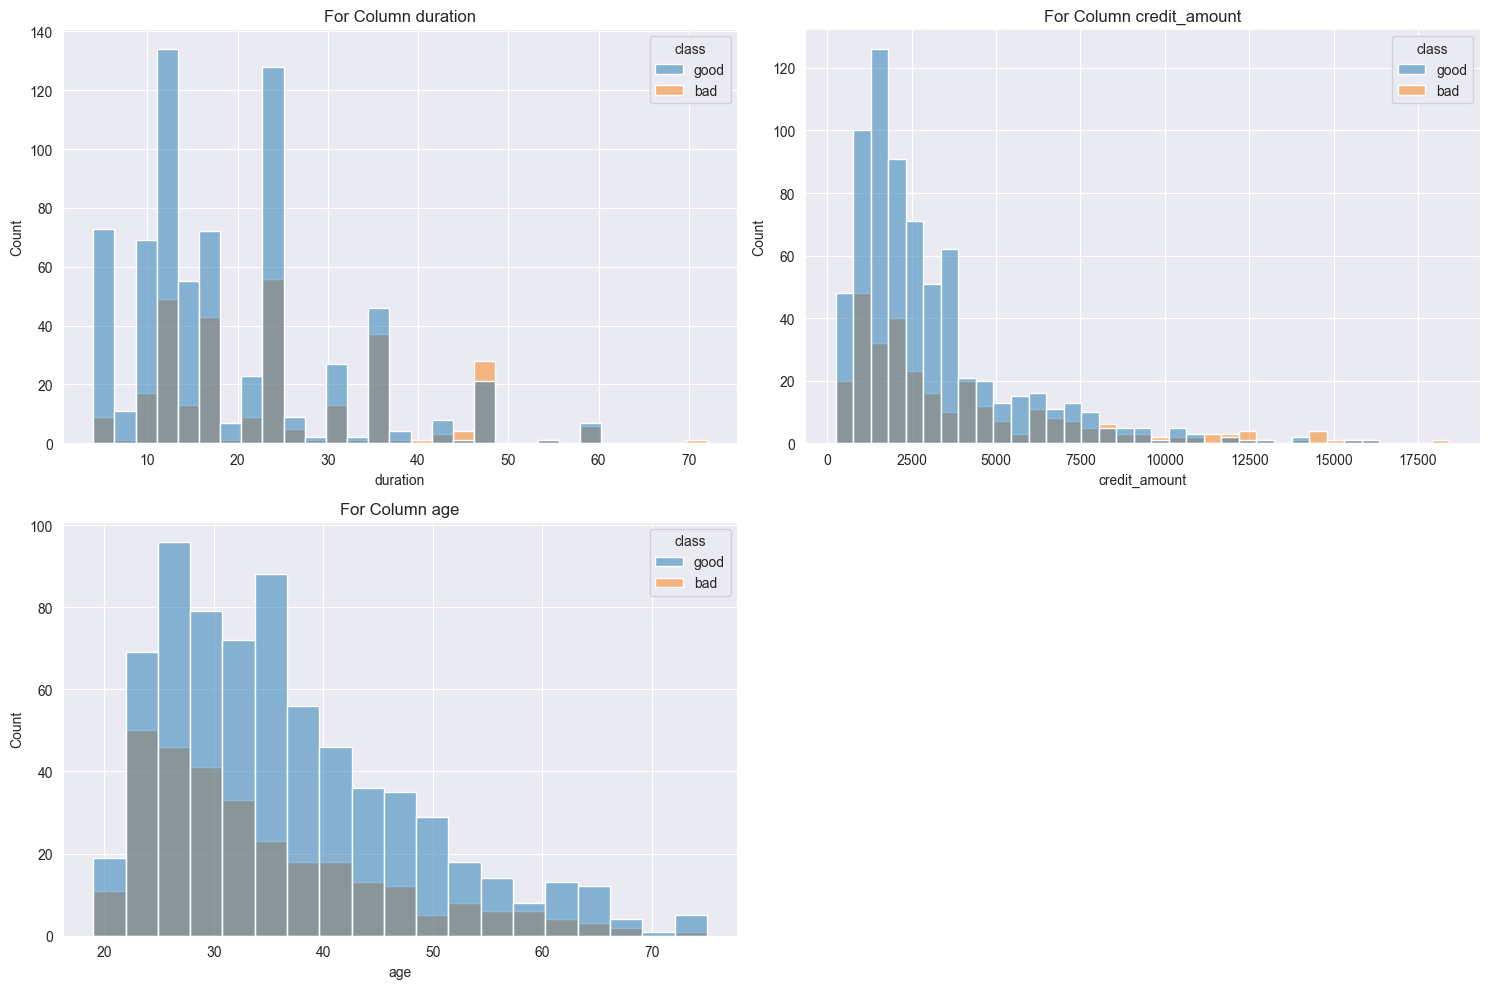

In [11]:
# Setting a Figure for the Graph
plt.figure(figsize=(15,10))

# Using a For Loop
# For all the columns i am setting hue = 'class'
for index, column in enumerate(real_num_feats): 
    ax = plt.subplot(2, 2, index + 1)
    sns.histplot(data=df_credits, x = column, hue= 'class', ax=ax)
    plt.title(f"For Column {column}")
    plt.tight_layout()

Text(0.5, 1.0, "Counts of our Target 'class'")

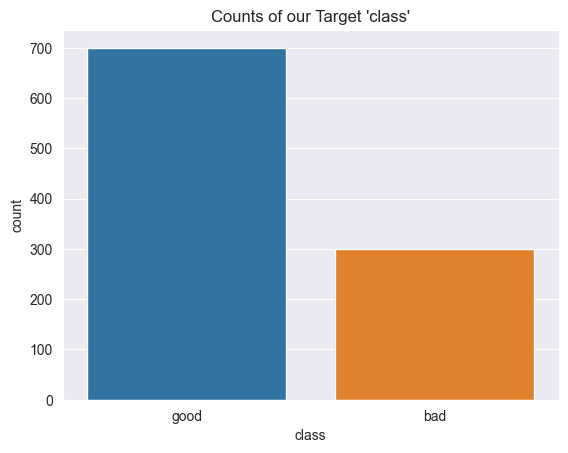

In [12]:
# Distribution of target alone
sns.countplot(data= df_credits, x='class')
plt.title("Counts of our Target 'class'")

### 1.3) Split data into training and test set. Do not use the test set until a final evaluation in 1.5. Preprocess the data (such as treatment of categorical variables) without using a pipeline and evaluate an initial LogisticRegression model with an training/validation split.

In [13]:
# Splitting the dataset into features and target first
df_X, df_y = df_credits.drop(columns=['class']), df_credits['class']

In [14]:
# Our Dataset with only Features Columns
df_X

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,4.0,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,2.0,real estate,22.0,none,own,1.0,skilled,1.0,none,yes
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,3.0,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,4.0,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,4.0,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12.0,existing paid,furniture/equipment,1736.0,<100,4<=X<7,3.0,female div/dep/mar,none,4.0,real estate,31.0,none,own,1.0,unskilled resident,1.0,none,yes
996,<0,30.0,existing paid,used car,3857.0,<100,1<=X<4,4.0,male div/sep,none,4.0,life insurance,40.0,none,own,1.0,high qualif/self emp/mgmt,1.0,yes,yes
997,no checking,12.0,existing paid,radio/tv,804.0,<100,>=7,4.0,male single,none,4.0,car,38.0,none,own,1.0,skilled,1.0,none,yes
998,<0,45.0,existing paid,radio/tv,1845.0,<100,1<=X<4,4.0,male single,none,4.0,no known property,23.0,none,for free,1.0,skilled,1.0,yes,yes


In [15]:
# Our Target Column
df_y

0      good
1       bad
2      good
3      good
4       bad
       ... 
995    good
996    good
997    good
998     bad
999    good
Name: class, Length: 1000, dtype: category
Categories (2, object): ['good', 'bad']

In [16]:
# Making a Train-Test Split for the above dataset
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.20, random_state=6)

In [17]:
# Our Training Features
X_train.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
771,<0,36.0,critical/other existing credit,education,8065.0,<100,1<=X<4,3.0,female div/dep/mar,none,2.0,no known property,25.0,none,own,2.0,high qualif/self emp/mgmt,1.0,yes,yes
938,0<=X<200,60.0,existing paid,education,6288.0,<100,1<=X<4,4.0,male single,none,4.0,no known property,42.0,none,for free,1.0,skilled,1.0,none,yes
223,no checking,24.0,delayed previously,business,2978.0,no known savings,1<=X<4,4.0,male single,none,4.0,real estate,32.0,none,own,2.0,skilled,2.0,yes,yes
378,0<=X<200,36.0,existing paid,new car,14318.0,<100,>=7,4.0,male single,none,2.0,no known property,57.0,none,for free,1.0,high qualif/self emp/mgmt,1.0,yes,yes
88,<0,18.0,existing paid,new car,2249.0,100<=X<500,4<=X<7,4.0,male single,none,3.0,car,30.0,none,own,1.0,high qualif/self emp/mgmt,2.0,yes,yes


In [18]:
# Our Testing Features
y_train.head()

771     bad
938     bad
223    good
378     bad
88     good
Name: class, dtype: category
Categories (2, object): ['good', 'bad']

In [19]:
# Categorical Features for only X_train
catfeats_train = cat_feats.copy()
catfeats_train.remove('class')
catfeats_train

['personal_status',
 'employment',
 'num_dependents',
 'credit_history',
 'other_parties',
 'residence_since',
 'checking_status',
 'foreign_worker',
 'own_telephone',
 'savings_status',
 'other_payment_plans',
 'installment_commitment',
 'job',
 'property_magnitude',
 'purpose',
 'existing_credits',
 'housing']

In [20]:
# For Categorical Features OneHotEncoder
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore', drop='if_binary')
X_transformed_cat = ohe.fit_transform(X_train[catfeats_train])
newcat_columns = ohe.get_feature_names_out()
df_trcat = pd.DataFrame(data=X_transformed_cat, columns=newcat_columns, index=X_train.index)
df_trcat

,personal_status_female div/dep/mar,personal_status_male div/sep,personal_status_male mar/wid,personal_status_male single,employment_1<=X<4,employment_4<=X<7,employment_<1,employment_>=7,employment_unemployed,num_dependents_2.0,...,purpose_repairs,purpose_retraining,purpose_used car,existing_credits_1.0,existing_credits_2.0,existing_credits_3.0,existing_credits_4.0,housing_for free,housing_own,housing_rent
771,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
938,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
223,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
378,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
88,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
980,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
227,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
713,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [21]:
# Standard Scaler for Numeric Features
stdscal = StandardScaler()
X_transformed_num = stdscal.fit_transform(X_train[real_num_feats])
df_trnum = pd.DataFrame(data = X_transformed_num, columns=real_num_feats, index=X_train.index)
df_trnum

,duration,credit_amount,age
771,1.262615,1.704063,-0.926623
938,3.258679,1.075134,0.568817
223,0.264582,-0.096366,-0.310854
378,1.262615,3.917172,1.888324
88,-0.234434,-0.354379,-0.486788
...,...,...,...
618,0.763599,0.067502,-1.278492
980,0.763599,1.817674,1.184587
227,-0.733450,1.633278,1.536455
713,-0.982958,-0.747593,-0.926623


In [22]:
# Whole Transformed Dataset
df_trans_manX = pd.concat([df_trcat, df_trnum], axis=1)
df_trans_manX.head()

,personal_status_female div/dep/mar,personal_status_male div/sep,personal_status_male mar/wid,personal_status_male single,employment_1<=X<4,employment_4<=X<7,employment_<1,employment_>=7,employment_unemployed,num_dependents_2.0,...,existing_credits_1.0,existing_credits_2.0,existing_credits_3.0,existing_credits_4.0,housing_for free,housing_own,housing_rent,duration,credit_amount,age
771,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.262615,1.704063,-0.926623
938,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,3.258679,1.075134,0.568817
223,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.264582,-0.096366,-0.310854
378,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.262615,3.917172,1.888324
88,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.234434,-0.354379,-0.486788


In [23]:
# Evaluating the Logistic Regression on Transformed Data
lr = LogisticRegression()
scores = cross_validate(X=df_trans_manX,y=y_train,estimator=lr,cv=10,n_jobs=-1,return_train_score=True)
scores_man = (pd.DataFrame(scores)).mean()
scores_man

fit_time       0.077189
score_time     0.007128
test_score     0.753750
train_score    0.801389
dtype: float64

### 1.4) Use ColumnTransformer and pipeline to encode categorical variables (your choice of OneHotEncoder or another one from the categorical_encoder package, or both). Evaluate Logistic Regression, linear support vector machines and nearest neighbors using cross-validation.

#### ENCODING ONLY CATEGORICAL FEATS:

In [24]:
# Defining a Column Transformer for Categorical Features
ct_cat = make_column_transformer(
        (OneHotEncoder(sparse=False, handle_unknown='ignore', drop='if_binary'),catfeats_train),
        ('passthrough',real_num_feats)
)

In [25]:
# Different Models for Evaluation
models = {
    'LogisticRegression': LogisticRegression(),
    'SVC': SVC(kernel='linear'),
    'KNClassifier': KNeighborsClassifier()
}

In [26]:
# Results Dict I will be Using
results_dict_cat = {
    'model_name':[],'fit_time':[],'score_time':[], 'test_score':[], 'train_score':[]
}

In [27]:
# Using 'for' Loop for Evaluation all models
for name, model in models.items():
    pipe_model = make_pipeline(ct_cat,model)
    result = cross_validate(estimator=pipe_model,X=X_train,y=y_train,cv=5,n_jobs=-1,return_train_score=True,verbose=True)
    
    results_dict_cat['model_name'].append(name)
#     print(result)
    for arg in result.keys():
        results_dict_cat[arg].append(result[arg].mean())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  9.3min remaining: 14.0min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 14.3min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.7s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.0s finished


In [32]:
# Dataframe of Results
results_models_cat = pd.DataFrame(results_dict_cat)
results_models_cat

,model_name,fit_time,score_time,test_score,train_score
0,LogisticRegression,0.129874,0.033689,0.7550,0.786250
1,SVC,662.929774,0.025546,0.7400,0.786875
2,KNClassifier,0.071283,0.366868,0.6675,0.762812


### Ques: How different are the results?
- As we can see here, all the three classifiers are good, however the Logistic Regression has highest Validation score compare to other models. 
- The Result of Logistic Regression is matching with the Manually Transformed Data without the Pipeline and Column Transforer.

#### NOW SCALLING THE CONTINOUS FEATURES IN ADDITION TO ENCODING

In [126]:
# Column Transformer for numerical Features too
ct_num_cat = make_column_transformer(
        (OneHotEncoder(sparse=False, handle_unknown='ignore', drop='if_binary'),catfeats_train),
        (StandardScaler(),real_num_feats)
)

In [127]:
# Results Dict I will be Using
results_dict_num_cat = {
    'model_name':[],'fit_time':[],'score_time':[], 'test_score':[], 'train_score':[]
}

In [128]:
# Using for Loop for Evaluation all models
for name, model in models.items():
    pipe_model = make_pipeline(ct_num_cat,model)
    result = cross_validate(estimator=pipe_model,X=X_train,y=y_train,cv=5,n_jobs=-1,return_train_score=True,verbose=True)
    results_dict_num_cat['model_name'].append(name)
    # print(result)
    for arg in result.keys():
        results_dict_num_cat[arg].append(result[arg].mean())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    7.3s remaining:   11.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    7.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.3s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.5s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished


In [129]:
# Dataframe of Results
results_models_num_cat = pd.DataFrame(results_dict_num_cat)
results_models_num_cat

,model_name,fit_time,score_time,test_score,train_score
0,LogisticRegression,0.137077,0.030326,0.75875,0.803750
1,SVC,0.164807,0.037426,0.73625,0.810937
2,KNClassifier,0.060015,0.340174,0.72500,0.812500


### Ques: How does scaling the continuous features with StandardScaler influence the results?
- Here we can see, SVC has not much difference and in fact accuracy has increased slightly as compared to below.
- In case of Logisitc Regression, Accuracy increased slightly like 0.003 percent which is not much to be considered.
- But in case of KNClassifier, there is a huge increase of 6% in accuracy which is very good after scaling of numeric Features.

### 1.5) Tune the parameters using GridSearchCV. Do the results improve? Evaluate only the best model on the test set. Visualize the performance as function of the parameters for all three models

#### SVC PARAMS OPTIMIZATION

In [130]:
# Defining a GridSearch CV
param_grid_svc = {
    'svc__C': [0.01,0.1,1,10,100],
    'svc__gamma': [10, 1, 0.1, 0.01, 0.001]
}

pipe_svc = make_pipeline(ct_num_cat, SVC(kernel='linear'))

gscv = GridSearchCV(pipe_svc, param_grid=param_grid_svc, cv=10, n_jobs=-1, return_train_score=True, verbose=True)

In [131]:
# Fitting the GridSearchCV 
gscv.fit(X_train, y_train)

Fitting 10 folds for each of 25 candidates, totalling 250 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='if_binary',
                                                                                       handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['personal_status',
                                                                          'employment',
                                                                          'num_dependents',
                                                                          'credit_history',
                                                                          'other_parties',
                                                                          'residence_since',
                                                                          'checking_status',
                                                                          'foreign_worker',
                                                                          'own_telephone',
                                                                          'savings_status',
                                                                          'other_payment_plans',
                                                                          'installment_commitment',
                                                                          'job',
                                                                          'property_magnitude',
                                                                          'purpose',
                                                                          'existing_credits',
                                                                          'housing']),
                                                                        ('standardscaler',
                                                                         StandardScaler(),
                                                                         ['duration',
                                                                          'credit_amount',
                                                                          'age'])])),
                                       ('svc', SVC(kernel='linear'))]),
             n_jobs=-1,
             param_grid={'svc__C': [0.01, 0.1, 1, 10, 100],
                         'svc__gamma': [10, 1, 0.1, 0.01, 0.001]},
             return_train_score=True, verbose=True)

In [132]:
# Best Parameters
gscv.best_params_

{'svc__C': 0.1, 'svc__gamma': 10}

In [133]:
# Best Score
gscv.best_score_

0.755

In [134]:
# Results of GSCV
pd.DataFrame(gscv.cv_results_).T

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
mean_fit_time,0.161448,0.164565,0.145135,0.16211,0.159573,0.161778,0.150083,0.185347,0.167745,0.16015,...,0.967888,0.961278,0.936529,0.897706,0.845599,9.966624,9.908793,10.555653,9.500987,8.178042
std_fit_time,0.029377,0.037136,0.027545,0.042052,0.046371,0.051295,0.037382,0.061905,0.035532,0.048606,...,0.19,0.218741,0.20933,0.227782,0.166047,2.937881,3.022204,3.05356,2.929817,1.753999
mean_score_time,0.04448,0.046355,0.034507,0.041264,0.042245,0.040401,0.037309,0.049064,0.04622,0.040923,...,0.037205,0.035375,0.029578,0.029648,0.025986,0.02971,0.029201,0.033647,0.028071,0.026203
std_score_time,0.008963,0.015184,0.005483,0.01509,0.014094,0.011157,0.010512,0.018392,0.016936,0.011256,...,0.008901,0.010552,0.00466,0.007661,0.009148,0.008877,0.005837,0.008985,0.009463,0.006648
param_svc__C,0.01,0.01,0.01,0.01,0.01,0.1,0.1,0.1,0.1,0.1,...,10,10,10,10,10,100,100,100,100,100
param_svc__gamma,10,1,0.1,0.01,0.001,10,1,0.1,0.01,0.001,...,10,1,0.1,0.01,0.001,10,1,0.1,0.01,0.001
params,"{'svc__C': 0.01, 'svc__gamma': 10}","{'svc__C': 0.01, 'svc__gamma': 1}","{'svc__C': 0.01, 'svc__gamma': 0.1}","{'svc__C': 0.01, 'svc__gamma': 0.01}","{'svc__C': 0.01, 'svc__gamma': 0.001}","{'svc__C': 0.1, 'svc__gamma': 10}","{'svc__C': 0.1, 'svc__gamma': 1}","{'svc__C': 0.1, 'svc__gamma': 0.1}","{'svc__C': 0.1, 'svc__gamma': 0.01}","{'svc__C': 0.1, 'svc__gamma': 0.001}",...,"{'svc__C': 10, 'svc__gamma': 10}","{'svc__C': 10, 'svc__gamma': 1}","{'svc__C': 10, 'svc__gamma': 0.1}","{'svc__C': 10, 'svc__gamma': 0.01}","{'svc__C': 10, 'svc__gamma': 0.001}","{'svc__C': 100, 'svc__gamma': 10}","{'svc__C': 100, 'svc__gamma': 1}","{'svc__C': 100, 'svc__gamma': 0.1}","{'svc__C': 100, 'svc__gamma': 0.01}","{'svc__C': 100, 'svc__gamma': 0.001}"
split0_test_score,0.7125,0.7125,0.7125,0.7125,0.7125,0.775,0.775,0.775,0.775,0.775,...,0.8125,0.8125,0.8125,0.8125,0.8125,0.8125,0.8125,0.8125,0.8125,0.8125
split1_test_score,0.7,0.7,0.7,0.7,0.7,0.7375,0.7375,0.7375,0.7375,0.7375,...,0.7375,0.7375,0.7375,0.7375,0.7375,0.7375,0.7375,0.7375,0.7375,0.7375
split2_test_score,0.7125,0.7125,0.7125,0.7125,0.7125,0.75,0.75,0.75,0.75,0.75,...,0.775,0.775,0.775,0.775,0.775,0.775,0.775,0.775,0.775,0.775


<br>**PS: Here we are getting around 2% increase in the accuracy as compared to before the hyperparameter Optimization in the case of `SVC`.**

<br>

#### LOGISTIC REGRESSION PARAMS OPTIMIZATION

In [135]:
# Defining the Parameter Grid for Logistic Regression
param_grid_lr = {
    'logisticregression__solver':['newton-cg','lbfgs','liblinear'],
    'logisticregression__C':[0.01, 0.1, 1, 10, 100],
    'logisticregression__penalty':['l2']
}

In [136]:
# Defining the Pipeline for the Logistic Regression
pipe_lr = make_pipeline(ct_num_cat, LogisticRegression())

In [137]:
# GSCV for Logistic Regression|
gscv2 = GridSearchCV(pipe_lr, param_grid_lr, cv=10, n_jobs=-1,return_train_score=True, verbose=True)

In [138]:
# Fitting the Above GSCV
gscv2.fit(X_train, y_train)

Fitting 10 folds for each of 15 candidates, totalling 150 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='if_binary',
                                                                                       handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['personal_status',
                                                                          'employment',
                                                                          'num_dependents',
                                                                          'credit_history',
                                                                          'other_parties',
                                                                          'residence_since',
                                                                          'checking_status',
                                                                          'foreign_worker',
                                                                          'own_telephone',
                                                                          'savings_status...
                                                                          'existing_credits',
                                                                          'housing']),
                                                                        ('standardscaler',
                                                                         StandardScaler(),
                                                                         ['duration',
                                                                          'credit_amount',
                                                                          'age'])])),
                                       ('logisticregression',
                                        LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logisticregression__C': [0.01, 0.1, 1, 10, 100],
                         'logisticregression__penalty': ['l2'],
                         'logisticregression__solver': ['newton-cg', 'lbfgs',
                                                        'liblinear']},
             return_train_score=True, verbose=True)

In [139]:
# Best Score
gscv2.best_score_

0.75875

In [140]:
# Best Parameters
gscv2.best_params_

{'logisticregression__C': 0.1,
 'logisticregression__penalty': 'l2',
 'logisticregression__solver': 'liblinear'}

In [141]:
# Results
pd.DataFrame(gscv2.cv_results_).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
mean_fit_time,0.119356,0.10989,0.086745,0.126424,0.108116,0.076425,0.158296,0.139712,0.080706,0.204311,0.181066,0.091222,0.234948,0.17734,0.09124
std_fit_time,0.016525,0.01704,0.019067,0.017567,0.02375,0.013553,0.027249,0.026509,0.009578,0.042174,0.022776,0.018319,0.035196,0.018626,0.008677
mean_score_time,0.033108,0.040247,0.036598,0.032721,0.032437,0.029359,0.028976,0.034427,0.031063,0.03535,0.034293,0.03143,0.031761,0.033703,0.025881
std_score_time,0.006086,0.023905,0.008652,0.013316,0.01174,0.008475,0.006666,0.006343,0.011424,0.006525,0.011804,0.007087,0.007186,0.008861,0.011136
param_logisticregression__C,0.01,0.01,0.01,0.1,0.1,0.1,1,1,1,10,10,10,100,100,100
param_logisticregression__penalty,l2,l2,l2,l2,l2,l2,l2,l2,l2,l2,l2,l2,l2,l2,l2
param_logisticregression__solver,newton-cg,lbfgs,liblinear,newton-cg,lbfgs,liblinear,newton-cg,lbfgs,liblinear,newton-cg,lbfgs,liblinear,newton-cg,lbfgs,liblinear
params,"{'logisticregression__C': 0.01, 'logisticregre...","{'logisticregression__C': 0.01, 'logisticregre...","{'logisticregression__C': 0.01, 'logisticregre...","{'logisticregression__C': 0.1, 'logisticregres...","{'logisticregression__C': 0.1, 'logisticregres...","{'logisticregression__C': 0.1, 'logisticregres...","{'logisticregression__C': 1, 'logisticregressi...","{'logisticregression__C': 1, 'logisticregressi...","{'logisticregression__C': 1, 'logisticregressi...","{'logisticregression__C': 10, 'logisticregress...","{'logisticregression__C': 10, 'logisticregress...","{'logisticregression__C': 10, 'logisticregress...","{'logisticregression__C': 100, 'logisticregres...","{'logisticregression__C': 100, 'logisticregres...","{'logisticregression__C': 100, 'logisticregres..."
split0_test_score,0.725,0.725,0.725,0.7875,0.7875,0.8125,0.825,0.825,0.8125,0.8125,0.8125,0.8125,0.8125,0.8125,0.8125
split1_test_score,0.7125,0.7125,0.7,0.725,0.725,0.725,0.725,0.725,0.725,0.7375,0.7375,0.7375,0.7375,0.7375,0.7375


<br>**PS: Here we are getting only around 1% increase in the accuracy as compared to before the hyperparameter Optimization in the case of `Logistic Regression`.**

<br>

#### KNCLASSIFIER PARAMS OPTIMIZATION

In [142]:
# Defining the Parameter Grid for KNC
param_grid_kn = {
    'kneighborsclassifier__n_neighbors':[5,7,9,11,13,15],
    'kneighborsclassifier__metric':['euclidean','manhattan','minkowski'],
    'kneighborsclassifier__weights':['uniform', 'distance']
}

In [143]:
# Defining the Pipeline
pipe_kn = make_pipeline(ct_num_cat, KNeighborsClassifier())

In [144]:
# GSCV for Kneighbors Classifier
gscv3 = GridSearchCV(pipe_kn, param_grid_kn, cv=10, n_jobs=-1, return_train_score=True, verbose=True)

In [145]:
# Fitting the Above GSCV
gscv3.fit(X_train, y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('onehotencoder',
                                                                         OneHotEncoder(drop='if_binary',
                                                                                       handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         ['personal_status',
                                                                          'employment',
                                                                          'num_dependents',
                                                                          'credit_history',
                                                                          'other_parties',
                                                                          'residence_since',
                                                                          'checking_status',
                                                                          'foreign_worker',
                                                                          'own_telephone',
                                                                          'savings_status...
                                                                        ('standardscaler',
                                                                         StandardScaler(),
                                                                         ['duration',
                                                                          'credit_amount',
                                                                          'age'])])),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'kneighborsclassifier__metric': ['euclidean',
                                                          'manhattan',
                                                          'minkowski'],
                         'kneighborsclassifier__n_neighbors': [5, 7, 9, 11, 13,
                                                               15],
                         'kneighborsclassifier__weights': ['uniform',
                                                           'distance']},
             return_train_score=True, verbose=True)

In [146]:
# Best Parameters
gscv3.best_params_

{'kneighborsclassifier__metric': 'euclidean',
 'kneighborsclassifier__n_neighbors': 11,
 'kneighborsclassifier__weights': 'distance'}

In [147]:
# Best Score 
gscv3.best_score_

0.76125

In [148]:
# Results
pd.DataFrame(gscv3.cv_results_).T

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
mean_fit_time,0.087244,0.07124,0.062799,0.074592,0.068579,0.072555,0.071099,0.07368,0.083634,0.07788,...,0.065345,0.067037,0.065231,0.077886,0.061414,0.062811,0.073043,0.070809,0.071836,0.068066
std_fit_time,0.020858,0.012407,0.010347,0.019266,0.010374,0.00994,0.017441,0.017518,0.02681,0.016766,...,0.011575,0.006619,0.016723,0.014652,0.007552,0.010427,0.015817,0.014626,0.018736,0.011857
mean_score_time,0.193734,0.034056,0.047133,0.038885,0.043296,0.038828,0.038689,0.03612,0.054025,0.032779,...,0.046649,0.033475,0.049323,0.037706,0.042599,0.035109,0.044932,0.03138,0.039852,0.037521
std_score_time,0.205739,0.007677,0.012164,0.019451,0.012851,0.012993,0.007478,0.012303,0.012644,0.008648,...,0.009449,0.007445,0.01637,0.01079,0.006055,0.006009,0.013325,0.006902,0.010065,0.009391
param_kneighborsclassifier__metric,euclidean,euclidean,euclidean,euclidean,euclidean,euclidean,euclidean,euclidean,euclidean,euclidean,...,minkowski,minkowski,minkowski,minkowski,minkowski,minkowski,minkowski,minkowski,minkowski,minkowski
param_kneighborsclassifier__n_neighbors,5,5,7,7,9,9,11,11,13,13,...,7,7,9,9,11,11,13,13,15,15
param_kneighborsclassifier__weights,uniform,distance,uniform,distance,uniform,distance,uniform,distance,uniform,distance,...,uniform,distance,uniform,distance,uniform,distance,uniform,distance,uniform,distance
params,"{'kneighborsclassifier__metric': 'euclidean', ...","{'kneighborsclassifier__metric': 'euclidean', ...","{'kneighborsclassifier__metric': 'euclidean', ...","{'kneighborsclassifier__metric': 'euclidean', ...","{'kneighborsclassifier__metric': 'euclidean', ...","{'kneighborsclassifier__metric': 'euclidean', ...","{'kneighborsclassifier__metric': 'euclidean', ...","{'kneighborsclassifier__metric': 'euclidean', ...","{'kneighborsclassifier__metric': 'euclidean', ...","{'kneighborsclassifier__metric': 'euclidean', ...",...,"{'kneighborsclassifier__metric': 'minkowski', ...","{'kneighborsclassifier__metric': 'minkowski', ...","{'kneighborsclassifier__metric': 'minkowski', ...","{'kneighborsclassifier__metric': 'minkowski', ...","{'kneighborsclassifier__metric': 'minkowski', ...","{'kneighborsclassifier__metric': 'minkowski', ...","{'kneighborsclassifier__metric': 'minkowski', ...","{'kneighborsclassifier__metric': 'minkowski', ...","{'kneighborsclassifier__metric': 'minkowski', ...","{'kneighborsclassifier__metric': 'minkowski', ..."
split0_test_score,0.75,0.75,0.775,0.775,0.7375,0.7375,0.7625,0.7625,0.75,0.75,...,0.775,0.775,0.7375,0.7375,0.7625,0.7625,0.75,0.75,0.775,0.775
split1_test_score,0.8,0.8,0.825,0.825,0.775,0.775,0.8,0.8,0.8,0.8,...,0.825,0.825,0.775,0.775,0.8,0.8,0.8,0.8,0.8,0.8


<br>**PS: Here we are getting around 5% increase in the accuracy as compared to before the hyperparameter Optimization in the case of `KNeighbors Classifier`.**

<br>

#### END RESULTS AFTER HYPERTUNING

In [149]:
# Dict of Results
results_all = {
    'Models':['SVC', 'Logistic Regression', 'KNeighbors Classifier'],
    'Best Parameters':[gscv.best_params_, gscv2.best_params_, gscv3.best_params_],
    'Score':[gscv.best_score_, gscv2.best_score_, gscv3.best_score_]
}

In [150]:
# Dataframe of Results
df_fresults = pd.DataFrame(results_all) 
df_fresults

,Models,Best Parameters,Score
0,SVC,"{'svc__C': 0.1, 'svc__gamma': 10}",0.75500
1,Logistic Regression,"{'logisticregression__C': 0.1, 'logisticregres...",0.75875
2,KNeighbors Classifier,"{'kneighborsclassifier__metric': 'euclidean', ...",0.76125


<br> **Here, we are getting KNeighbors Classifier as the Best Model with the Accuracy of 0.761 and we will be evaluating test dataset on that model only**

In [151]:
# Best KNClassifier Estimator 
best_kn = gscv3.best_estimator_
best_kn

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  ['personal_status',
                                                   'employment',
                                                   'num_dependents',
                                                   'credit_history',
                                                   'other_parties',
                                                   'residence_since',
                                                   'checking_status',
                                                   'foreign_worker',
                                                   'own_telephone',
                                                   'savings_status',
                                                   'other_payment_plans',
                                                   'installment_commitment',
                                                   'job', 'property_magnitude',
                                                   'purpose',
                                                   'existing_credits',
                                                   'housing']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['duration', 'credit_amount',
                                                   'age'])])),
                ('kneighborsclassifier',
                 KNeighborsClassifier(metric='euclidean', n_neighbors=11,
                                      weights='distance'))])

In [152]:
# Fitting Again
best_kn.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  ['personal_status',
                                                   'employment',
                                                   'num_dependents',
                                                   'credit_history',
                                                   'other_parties',
                                                   'residence_since',
                                                   'checking_status',
                                                   'foreign_worker',
                                                   'own_telephone',
                                                   'savings_status',
                                                   'other_payment_plans',
                                                   'installment_commitment',
                                                   'job', 'property_magnitude',
                                                   'purpose',
                                                   'existing_credits',
                                                   'housing']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['duration', 'credit_amount',
                                                   'age'])])),
                ('kneighborsclassifier',
                 KNeighborsClassifier(metric='euclidean', n_neighbors=11,
                                      weights='distance'))])

In [153]:
# Scoring of the Test Data Only
best_kn.score(X_test, y_test)

0.685

**Here we are getting the Score of 0.685 for the Test Data**

<br>

### 1.7) Visualize the 20 most important coefficients for LogisticRegression and Linear Support Vector Machines using hyper-parameters that performed well in the grid-search.


#### Logistic Regression:

In [154]:
# Best LR Pipeline
best_lrpipe = gscv2.best_estimator_
best_lrpipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  ['personal_status',
                                                   'employment',
                                                   'num_dependents',
                                                   'credit_history',
                                                   'other_parties',
                                                   'residence_since',
                                                   'checking_status',
                                                   'foreign_worker',
                                                   'own_telephone',
                                                   'savings_status',
                                                   'other_payment_plans',
                                                   'installment_commitment',
                                                   'job', 'property_magnitude',
                                                   'purpose',
                                                   'existing_credits',
                                                   'housing']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['duration', 'credit_amount',
                                                   'age'])])),
                ('logisticregression',
                 LogisticRegression(C=0.1, solver='liblinear'))])

In [155]:
# Best Logistic Regression
best_lr = best_lrpipe.named_steps['logisticregression']
best_lr

LogisticRegression(C=0.1, solver='liblinear')

In [156]:
# Coefficients
coeffs_lr = best_lr.coef_.flatten()
coeffs_lr

array([-0.14806443, -0.10735576,  0.09789867,  0.34121838,  0.06829833,
        0.40476026, -0.26084851,  0.07326567, -0.1017789 , -0.07118055,
       -0.24122451,  0.49923097,  0.15762283,  0.07947756, -0.31140999,
       -0.10298781,  0.33322429, -0.04653963,  0.25768109, -0.12344065,
       -0.0927347 ,  0.14219112, -0.21253249, -0.58206182,  0.11602863,
        0.86226254, -0.12760087,  0.2009685 , -0.0530727 ,  0.04042896,
       -0.41013466,  0.23710726,  0.36936799, -0.0904599 ,  0.39398152,
       -0.11982476,  0.27584478,  0.1161848 ,  0.03968575, -0.24801847,
        0.11770321,  0.05460728, -0.03597161,  0.04735799,  0.05609673,
        0.07924539, -0.19816952,  0.24652426,  0.01521215, -0.0208633 ,
       -0.18448896,  0.08172369, -0.41277194,  0.10655248,  0.14321723,
       -0.19180099,  0.13342695,  0.51348955,  0.14555276,  0.02637972,
        0.05273241, -0.04096803,  0.02873579,  0.24686217, -0.09190111,
       -0.32839355, -0.29017319,  0.11018151])

In [157]:
# Features
features = best_lrpipe.named_steps['columntransformer'].named_transformers_['onehotencoder'].get_feature_names_out().tolist() + real_num_feats
features

['personal_status_female div/dep/mar',
 'personal_status_male div/sep',
 'personal_status_male mar/wid',
 'personal_status_male single',
 'employment_1<=X<4',
 'employment_4<=X<7',
 'employment_<1',
 'employment_>=7',
 'employment_unemployed',
 'num_dependents_2.0',
 'credit_history_all paid',
 'credit_history_critical/other existing credit',
 'credit_history_delayed previously',
 'credit_history_existing paid',
 'credit_history_no credits/all paid',
 'other_parties_co applicant',
 'other_parties_guarantor',
 'other_parties_none',
 'residence_since_1.0',
 'residence_since_2.0',
 'residence_since_3.0',
 'residence_since_4.0',
 'checking_status_0<=X<200',
 'checking_status_<0',
 'checking_status_>=200',
 'checking_status_no checking',
 'foreign_worker_yes',
 'own_telephone_yes',
 'savings_status_100<=X<500',
 'savings_status_500<=X<1000',
 'savings_status_<100',
 'savings_status_>=1000',
 'savings_status_no known savings',
 'other_payment_plans_bank',
 'other_payment_plans_none',
 'other

Text(0.5, 1.0, 'Top 20 Features (Logistic Regression)')

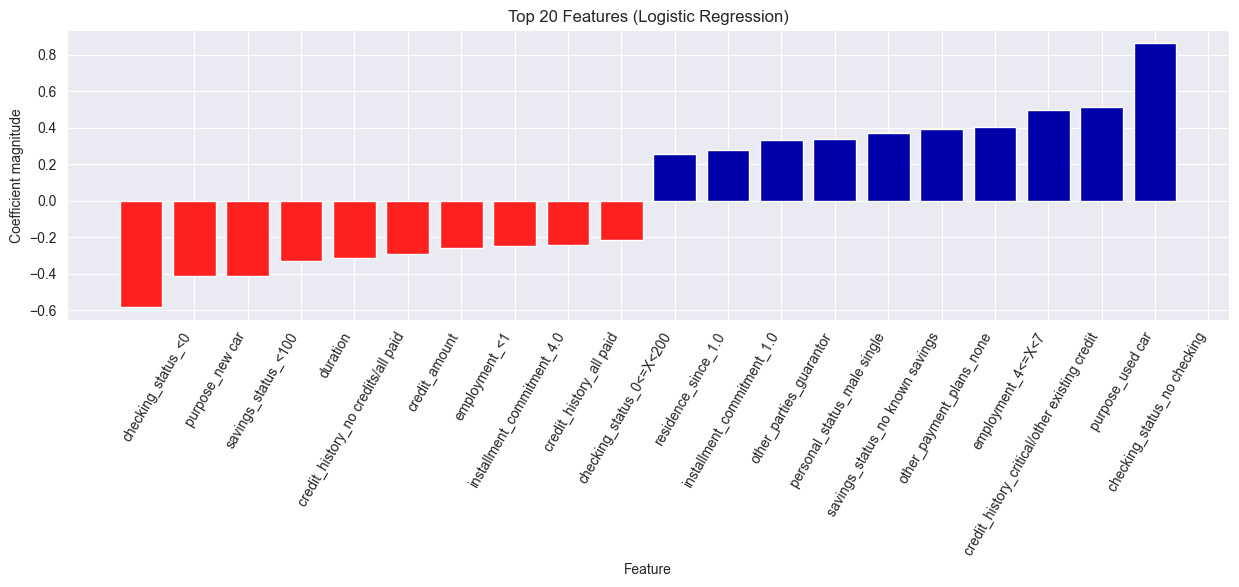

In [158]:
# Visualizing the Top 20 Features and Coeffs of Logistic Regression
mglearn.tools.visualize_coefficients(coeffs_lr, features, n_top_features=10)
plt.title('Top 20 Features (Logistic Regression)')

<br>

#### Linear Support Vector Classifier:

In [159]:
# Best SVC Pipeline
best_svcpipe = gscv.best_estimator_
best_svcpipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse=False),
                                                  ['personal_status',
                                                   'employment',
                                                   'num_dependents',
                                                   'credit_history',
                                                   'other_parties',
                                                   'residence_since',
                                                   'checking_status',
                                                   'foreign_worker',
                                                   'own_telephone',
                                                   'savings_status',
                                                   'other_payment_plans',
                                                   'installment_commitment',
                                                   'job', 'property_magnitude',
                                                   'purpose',
                                                   'existing_credits',
                                                   'housing']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['duration', 'credit_amount',
                                                   'age'])])),
                ('svc', SVC(C=0.1, gamma=10, kernel='linear'))])

In [160]:
# Best SVC Model
best_svc = best_svcpipe.named_steps['svc']
best_svc

SVC(C=0.1, gamma=10, kernel='linear')

In [161]:
# Coefficients
coeffs_svc = best_svc.coef_.flatten()
coeffs_svc

array([-0.18105437, -0.12794739,  0.10956281,  0.19943896,  0.08854703,
        0.26973318, -0.313871  ,  0.07074011, -0.11514931, -0.03243285,
       -0.40326722,  0.46048633,  0.32409069,  0.11660559, -0.49791538,
       -0.1       ,  0.31891723, -0.21891723,  0.24373268, -0.23897712,
       -0.03472881,  0.02997326, -0.22851907, -0.57063623,  0.26220774,
        0.53694756, -0.4       ,  0.10385285, -0.03604322, -0.13590475,
       -0.37454801,  0.22057962,  0.32591636, -0.08610546,  0.28610546,
       -0.2       ,  0.2612688 ,  0.08424912, -0.04023969, -0.30527823,
        0.14305499, -0.05871723, -0.0159783 , -0.06835946,  0.03071106,
        0.07905251, -0.20312138,  0.09335781, -0.0263016 , -0.1       ,
       -0.32270072,  0.17298998, -0.45738156,  0.23305357,  0.00110172,
       -0.18386664,  0.27189005,  0.41121521,  0.06678687, -0.04189606,
        0.07510919, -0.1       ,  0.03451295,  0.12998321, -0.16449616,
       -0.27717016, -0.24003133,  0.08957297])

Text(0.5, 1.0, 'Top 20 Features (Linear SVM)')

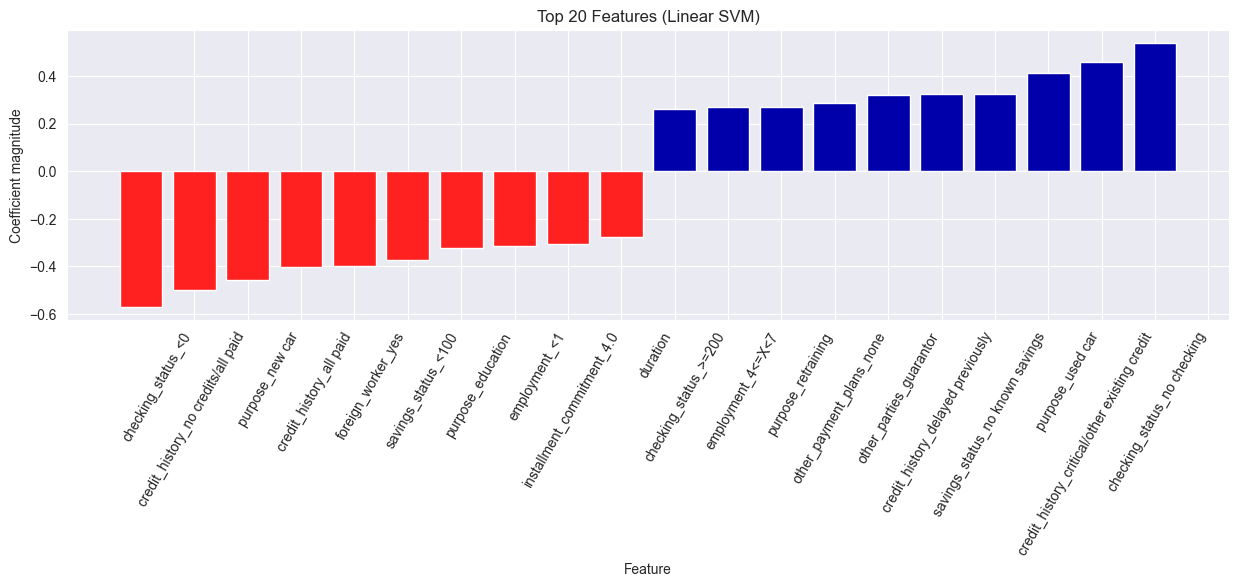

In [162]:
# Visualizing the Top 20 Features and Coeffs of Linear SVM
mglearn.tools.visualize_coefficients(coeffs_svc, features, n_top_features=10)
plt.title('Top 20 Features (Linear SVM)')

<br>

#### Here we can notice one thing: both the visualized graphs of Coefficients of both Models are very similar to each other even the individual values are different.

<br> <br>

# Task 2: Regression on Sydney Dataset

In [173]:
# Reading the Dataset and storing it as 'df_housing'
df_housing = pd.read_csv('data.csv')
df_housing

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


**What each columns represents:**

1. price: price at which house was sold.
2. date: This shows date on which house was sold.
3. bedrooms: The number of bedrooms.
4. bathrooms: The number of bathrooms.
5. sqft_living: living area of the house in square feet.
6. sqft_lot: total area of the lot in square feet.
7. floors: number of floors in the house.
8. waterfront: binary variable indicating the house is on a waterfront or not.
9. view: How good the view of the property is between 0 and 4.
10. condition: The condition of the house between 0 and 5.
11. sqft_above: Apart from the basement The square footage of the house.
12. sqft_basement: Square footage of the basement.
13. yr_built: The year in which the house was built.
14. yr_renovated: The year in which the house was renovated.
15. street: street address of the house.
16. city: The city of the house
17. statezip: The state and zipcode of the house where is located.
18. country: The country of houses (USA).

In [174]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

##### _Some preprocessing:_

In [175]:
# Converting the date to datetime format
df_housing['date'] = pd.to_datetime(df_housing['date'])

In [176]:
# Converting some columns to their respective datatypes
df_housing['price'] = df_housing['price'].astype('int64')
df_housing['bedrooms'] = df_housing['bedrooms'].astype('int64')
df_housing['bathrooms'] = df_housing['bathrooms'].astype('int64')
df_housing['floors']    = df_housing['floors'].astype('int64')
df_housing['street']    = df_housing['street'].astype('string')
df_housing['city']      = df_housing['city'].astype('string')
df_housing['statezip']  = df_housing['statezip'].astype('string')
df_housing['country']   = df_housing['country'].astype('string')

In [177]:
# Checking the Datatype of Columns
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           4600 non-null   datetime64[ns]
 1   price          4600 non-null   int64         
 2   bedrooms       4600 non-null   int64         
 3   bathrooms      4600 non-null   int64         
 4   sqft_living    4600 non-null   int64         
 5   sqft_lot       4600 non-null   int64         
 6   floors         4600 non-null   int64         
 7   waterfront     4600 non-null   int64         
 8   view           4600 non-null   int64         
 9   condition      4600 non-null   int64         
 10  sqft_above     4600 non-null   int64         
 11  sqft_basement  4600 non-null   int64         
 12  yr_built       4600 non-null   int64         
 13  yr_renovated   4600 non-null   int64         
 14  street         4600 non-null   string        
 15  city           4600 n

### 2.1) Determine which features are continuous vs categorical. Drop rows without a valid sales price.

#### First, we are removing the Records that have 0 as the price

In [178]:
# Here i am replacing 0 as NaN and then removing it from the dataframe
df_housing['price'].replace(0, np.nan,inplace=True)
df_housing.dropna(inplace=True)

In [179]:
# Null Values in dataframe
df_housing.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

#### Numerical and Categorical Features:

In [180]:
# Features that look like numeric
num_look_vars = df_housing.select_dtypes(np.number).columns.tolist()
print('NUMERICAL FEATURES: \n')
num_look_vars.remove('price') # Removing the 'Price Column'
num_look_vars

NUMERICAL FEATURES: 



['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated']

In [181]:
# Features which are numeric but actually Categorical as they have limited values
cat_numlike_feats = [
    'waterfront',
    'view',
    'condition'
]

In [182]:
# Actual Numerical Features
num_vars =  list(set(num_look_vars) -  set(cat_numlike_feats))
num_vars

['yr_built',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'floors',
 'sqft_lot',
 'sqft_basement',
 'sqft_above',
 'yr_renovated']

In [183]:
# The Categorical Features that are not important
cat_notreq = [
    'date',
    'street',
]

In [184]:
# Other columns are Categorical Features 
cat_vars = list((set(df_housing.columns) - set(num_vars) - set(cat_notreq)))
print('CATEGORICAL FEATURES: \n')
cat_vars.remove('price') # Again removing the 'Price Column'
cat_vars

CATEGORICAL FEATURES: 



['city', 'condition', 'country', 'statezip', 'waterfront', 'view']

### 2.2) Visualize the univariate distribution of each continuous feature, and the distribution of the target.


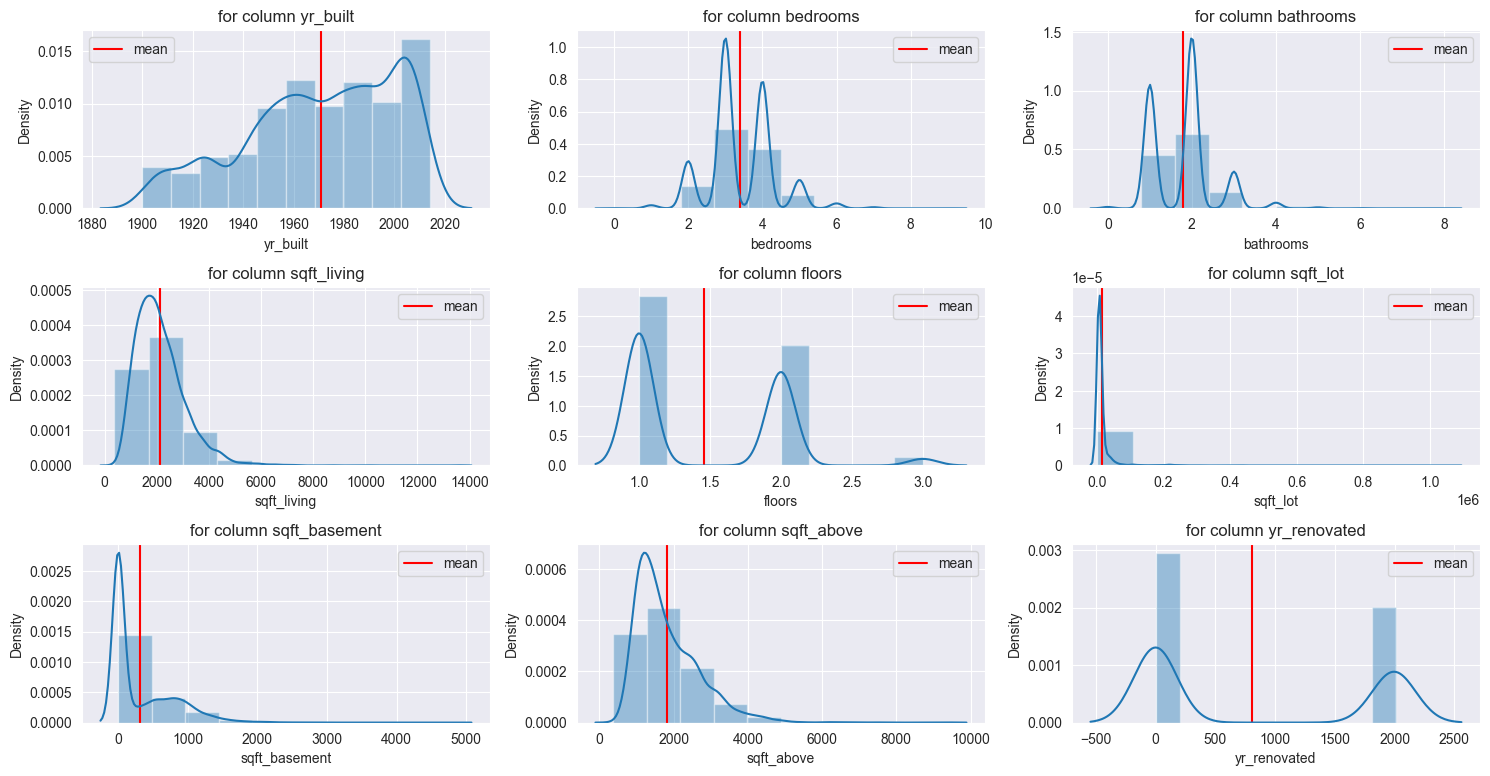

In [185]:
# Setting a Figure for the Graph
plt.figure(figsize=(15,10))

# Using a For Loop
# For all the columns i am setting hue = 'class'
for index, column in enumerate(num_vars): 
    ax = plt.subplot(4, 3, index + 1)
    plt.axvline(df_housing[column].mean(),color='red', label='mean')
    plt.title(f'for column {column}')
    sns.distplot(df_housing[column], ax=ax, bins=10)
    plt.tight_layout()
    plt.legend()
    

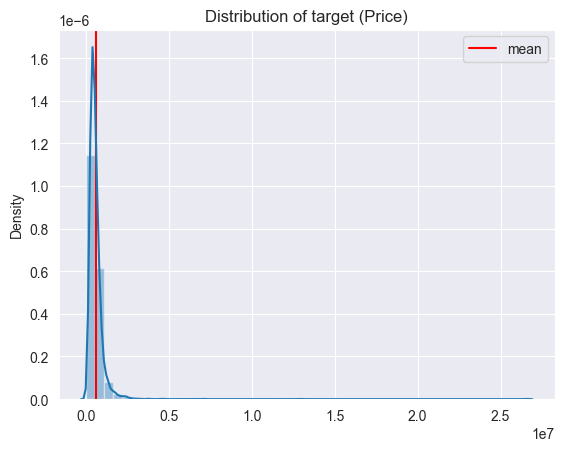

In [186]:
# Distribution of the Target 'price' with the mean
plt.axvline(df_housing['price'].mean(), color='red', label = 'mean')
sns.distplot(x= df_housing['price'])
plt.title('Distribution of target (Price)')
plt.legend()

Text(0.5, 1.0, 'Box Plot of Target (Price)')

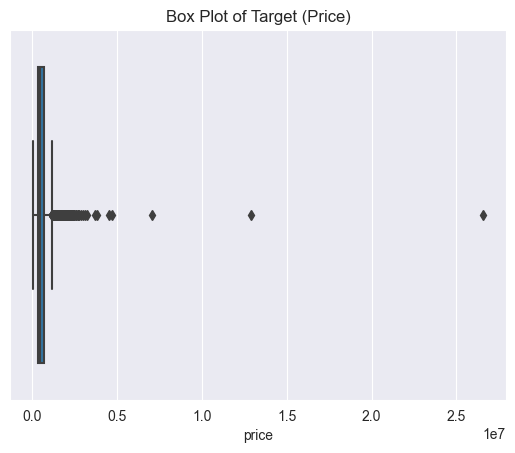

In [187]:
#Box Plot of the target Column
sns.boxplot(data=df_housing, x='price')
plt.title('Box Plot of Target (Price)')

#### Que: Do you notice anything?
- Here we can see the graph is very different than other continous features, it skips many values in between so it is very stange graph as seeing it first time.

#### Que: Is there sdescribeething that might require special treatment?
- First, we have to remove the outliers which have price more than `3000000` and we have to remove it.
- Then, we have to apply log transformation for the target column so it can be seen as normal distribution because at the present moment it is a left skewed Distribution.

**OUTLIER REMOVAL**

In [121]:
# Outlier dataframe having price > 3e6
df_outliers = df_housing.query('price > 3e6') # 0.3 * 10^7
df_outliers

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
252,2014-05-07,3200000.0,7,4,6210,8856,2,0,2,5,4760,1450,1910,0,1230 Warren Ave N,Seattle,WA 98109,USA
1567,2014-05-29,3100000.0,6,4,6980,15682,3,0,4,4,5330,1650,1999,0,5243 Forest Ave SE,Mercer Island,WA 98040,USA
1637,2014-05-30,3710000.0,4,3,5550,28078,2,0,2,4,3350,2200,2000,0,3222 78th Pl NE,Medina,WA 98039,USA
2286,2014-06-11,7062500.0,5,4,10040,37325,2,1,2,3,7680,2360,1940,2001,4442 95th Ave NE,Bellevue,WA 98004,USA
2654,2014-06-17,4668000.0,5,6,9640,13068,1,1,4,3,4820,4820,1983,2009,5044 Butterworth Rd,Mercer Island,WA 98040,USA
2761,2014-06-18,4489000.0,4,3,6430,27517,2,0,0,3,6430,0,2001,0,1149-1199 91st Ave NE,Bellevue,WA 98004,USA
3729,2014-07-01,3800000.0,5,5,7050,42840,1,0,2,4,4320,2730,1978,2000,1365 91st Ave NE,Clyde Hill,WA 98004,USA
4346,2014-06-23,12899000.0,3,2,2190,11394,1,0,0,3,1550,640,1956,2001,5426 40th Ave W,Seattle,WA 98199,USA
4350,2014-07-03,26590000.0,3,2,1180,7793,1,0,0,4,1180,0,1992,0,12005 SE 219th Ct,Kent,WA 98031,USA


In [122]:
# Dataframe without the outliers
df_housing = df_housing[df_housing.price < 3e6]
df_housing

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02,313000.0,3,1,1340,7912,1,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02,2384000.0,5,2,3650,9050,2,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02,342000.0,3,2,1930,11947,1,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02,420000.0,3,2,2000,8030,1,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02,550000.0,4,2,1940,10500,1,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09,308166.0,3,1,1510,6360,1,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09,534333.0,3,2,1460,7573,2,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09,416904.0,3,2,3010,7014,2,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10,203400.0,4,2,2090,6630,1,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


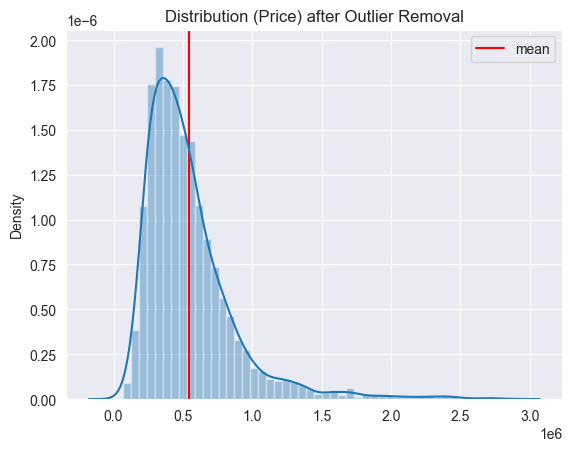

In [124]:
# Price Distribution after outlier removal
plt.axvline(df_housing['price'].mean(), color='red', label='mean')
sns.distplot(x= df_housing['price'])
plt.title('Distribution (Price) after Outlier Removal')
plt.legend()

**LOG TRANSFORMATION**

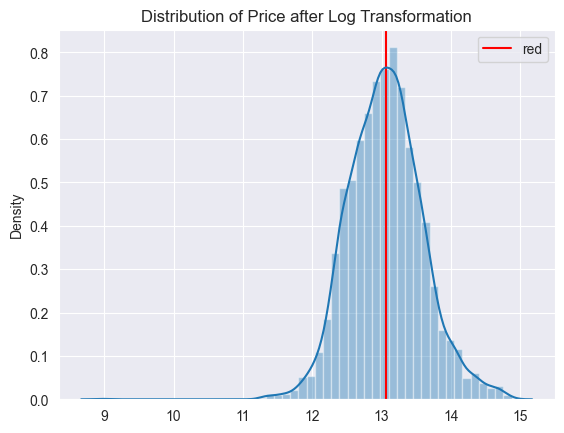

In [125]:
# Distribution of the Target 'price' after log transformation
plt.axvline(np.log(df_housing['price']).mean(), color='red', label = 'red')
sns.distplot(x= np.log(df_housing['price']))
plt.title('Distribution of Price after Log Transformation')
plt.legend()

<br><br>

### 2.3) Visualize the dependency of the target on each continuous feature (2d scatter plot).

In [240]:
# Continous Features
num_vars

['bedrooms',
 'yr_built',
 'sqft_above',
 'yr_renovated',
 'sqft_living',
 'floors',
 'sqft_lot',
 'bathrooms',
 'sqft_basement']

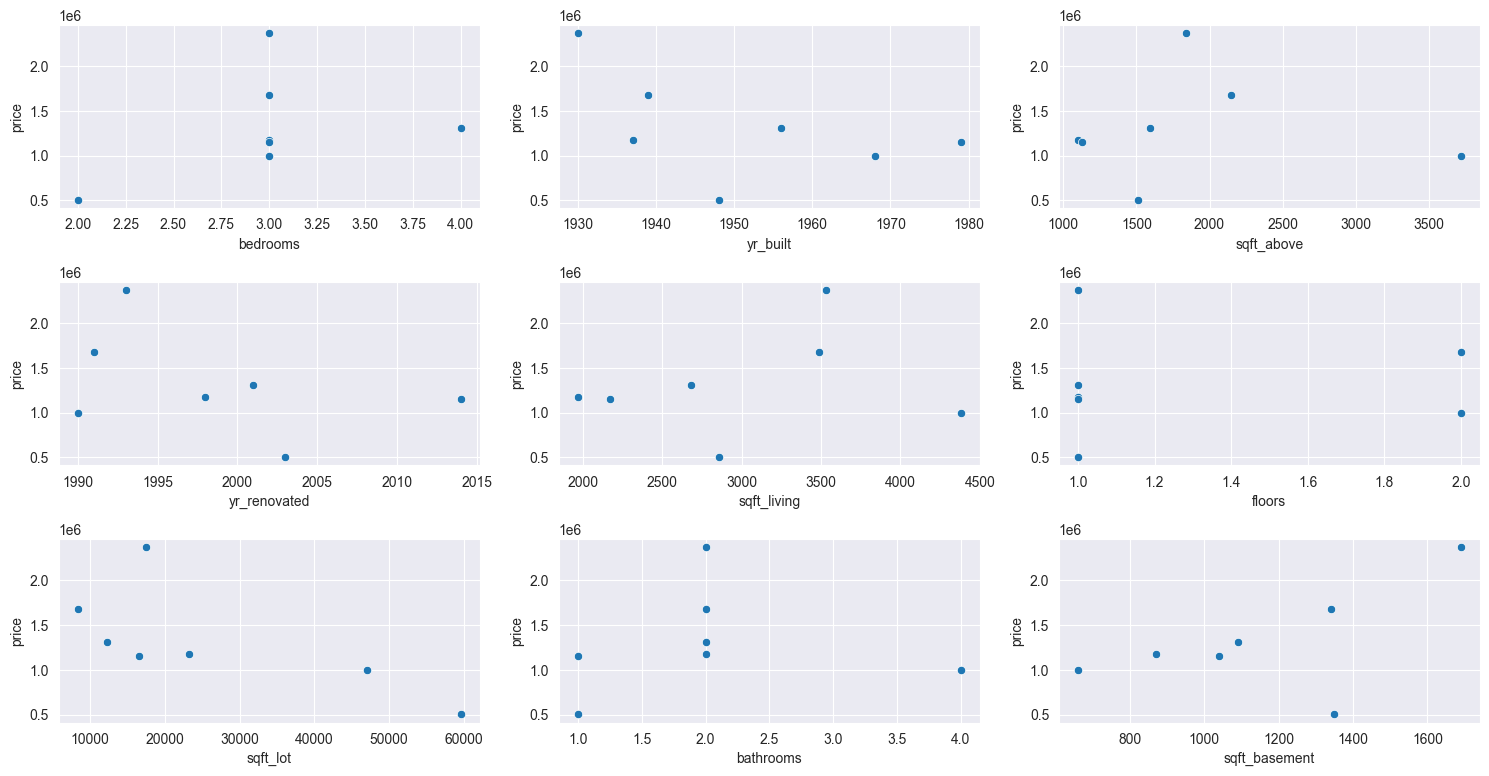

In [241]:
# Setting a Figure for the Graph
plt.figure(figsize=(15,10))

# Using a For Loop
# For all the columns i am setting hue = 'class'
for index, column in enumerate(num_vars): 
    ax = plt.subplot(4, 3, index + 1)
    sns.scatterplot(data = df_housing, x = column, y = 'price', ax=ax)
    plt.tight_layout()

### 2.4) Split data in training and test set. Do not use the test-set unless for a final evaluation in 2.5.


In [242]:
# Whole Dataframe 
df_housing.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
1163,2014-05-22,503000.0,2.0,1.0,2860,59612,1,1.0,4.0,3,1510,1350.0,1948,2003.0,4338 SW 307th St,Federal Way,WA 98023,USA
1464,2014-05-28,1175000.0,3.0,2.0,1970,23180,1,1.0,4.0,3,1100,870.0,1937,1998.0,5923 Beach Dr SW,Seattle,WA 98136,USA
2031,2014-06-06,1150000.0,3.0,1.0,2170,16600,1,1.0,2.0,3,1130,1040.0,1979,2014.0,2244 West Lake Sammamish Pkwy NE,Redmond,WA 98052,USA
3283,2014-06-25,995000.0,3.0,4.0,4380,47044,2,1.0,3.0,3,3720,660.0,1968,1990.0,14423 25th Ave SW,Burien,WA 98166,USA
3682,2014-06-30,1309500.0,4.0,2.0,2680,12215,1,1.0,4.0,3,1590,1090.0,1956,2001.0,18051 Normandy Terrace SW,Normandy Park,WA 98166,USA


In [243]:
# Splitting the X and y 
X , y = df_housing.drop('price',axis=1), df_housing['price']

In [245]:
# Features
X

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
1163,2014-05-22,2.0,1.0,2860,59612,1,1.0,4.0,3,1510,1350.0,1948,2003.0,4338 SW 307th St,Federal Way,WA 98023,USA
1464,2014-05-28,3.0,2.0,1970,23180,1,1.0,4.0,3,1100,870.0,1937,1998.0,5923 Beach Dr SW,Seattle,WA 98136,USA
2031,2014-06-06,3.0,1.0,2170,16600,1,1.0,2.0,3,1130,1040.0,1979,2014.0,2244 West Lake Sammamish Pkwy NE,Redmond,WA 98052,USA
3283,2014-06-25,3.0,4.0,4380,47044,2,1.0,3.0,3,3720,660.0,1968,1990.0,14423 25th Ave SW,Burien,WA 98166,USA
3682,2014-06-30,4.0,2.0,2680,12215,1,1.0,4.0,3,1590,1090.0,1956,2001.0,18051 Normandy Terrace SW,Normandy Park,WA 98166,USA
3791,2014-07-01,3.0,2.0,3530,17450,1,1.0,3.0,3,1840,1690.0,1930,1993.0,7436 E Mercer Way,Mercer Island,WA 98040,USA
4142,2014-07-08,3.0,2.0,3490,8343,2,1.0,4.0,4,2150,1340.0,1939,1991.0,Burke-Gilman Trail,Seattle,WA 98125,USA


In [97]:
# Target 
y.head()

1163     503000.0
1464    1175000.0
2031    1150000.0
2286    7062500.0
2654    4668000.0
Name: price, dtype: float64

In [98]:
# Train Test splitting 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=110)

In [99]:
# Our Training Dataset of Features
X_train.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4142,2014-07-08 00:00:00,3.0,2.50,3490,8343,2.0,1.0,4.0,4,2150,1340.0,1939,1991.0,Burke-Gilman Trail,Seattle,WA 98125,USA
3791,2014-07-01 00:00:00,3.0,2.25,3530,17450,1.0,1.0,3.0,3,1840,1690.0,1930,1993.0,7436 E Mercer Way,Mercer Island,WA 98040,USA
1464,2014-05-28 00:00:00,3.0,2.50,1970,23180,1.0,1.0,4.0,3,1100,870.0,1937,1998.0,5923 Beach Dr SW,Seattle,WA 98136,USA
3682,2014-06-30 00:00:00,4.0,2.50,2680,12215,1.0,1.0,4.0,3,1590,1090.0,1956,2001.0,18051 Normandy Terrace SW,Normandy Park,WA 98166,USA
3283,2014-06-25 00:00:00,3.0,4.50,4380,47044,2.0,1.0,3.0,3,3720,660.0,1968,1990.0,14423 25th Ave SW,Burien,WA 98166,USA


### Que: Use ColumnTransformer and pipeline to encode categorical variables (your choice of OneHotEncoder or another one from the categorical_encoder package, or both). Impute missing values using SimpleImputer. 

In [211]:
# Categorical Feats that to be encode
cat_vars

['statezip', 'condition', 'waterfront', 'view', 'city', 'country']

In [212]:
# Binary Feature
binary_vars = ['waterfront']

In [213]:
# Removing the binary Feature
cat_vars = list(set(cat_vars) - set(binary_vars))
cat_vars

['statezip', 'condition', 'view', 'city', 'country']

**PS: Here as there are no null values, we are not using `SimpleInputer` and we are only using `OneHotEncoder`**

In [214]:
ct = make_column_transformer(
    (make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(sparse=False, handle_unknown='ignore')), cat_vars),
    (OneHotEncoder(sparse=False, handle_unknown='ignore', drop='if_binary'), binary_vars)
)

In [215]:
X_transformed_cat = ct.fit_transform(X_train)
X_transformed_cat

array([[0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
        1., 1., 1.],
       [0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
        0., 1., 1.],
       [0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
        0., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
        0., 1., 1.],
       [1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
        0., 1., 1.],
       [0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
        0., 1., 1.]])

In [218]:
ohecat_vars = list(ct.named_transformers_['pipeline'].get_feature_names_out())
ohebin_vars = list(ct.named_transformers_['onehotencoder'].get_feature_names_out())
cat_cols = ohecat_vars + ohebin_vars
cat_cols

['statezip_WA 98004',
 'statezip_WA 98023',
 'statezip_WA 98040',
 'statezip_WA 98125',
 'statezip_WA 98136',
 'statezip_WA 98166',
 'condition_3',
 'condition_4',
 'view_2.0',
 'view_3.0',
 'view_4.0',
 'city_Bellevue',
 'city_Burien',
 'city_Federal Way',
 'city_Mercer Island',
 'city_Normandy Park',
 'city_Seattle',
 'country_USA',
 'waterfront_1.0']

In [220]:
X_trcat = pd.DataFrame(data = X_transformed_cat, columns= cat_cols, index = X_train.index)
X_trcat

,statezip_WA 98004,statezip_WA 98023,statezip_WA 98040,statezip_WA 98125,statezip_WA 98136,statezip_WA 98166,condition_3,condition_4,view_2.0,view_3.0,view_4.0,city_Bellevue,city_Burien,city_Federal Way,city_Mercer Island,city_Normandy Park,city_Seattle,country_USA,waterfront_1.0
4142,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
3791,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1464,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
3682,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
3283,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
2286,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1163,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0


In [176]:
X_transformed_cat.shape

(7, 20)

In [177]:
ct.named_transformers_['pipeline'].get_feature_names_out()

array(['statezip_WA 98004', 'statezip_WA 98023', 'statezip_WA 98040',
       'statezip_WA 98125', 'statezip_WA 98136', 'statezip_WA 98166',
       'condition_3', 'condition_4', 'waterfront_1.0', 'view_2.0',
       'view_3.0', 'view_4.0', 'city_Bellevue', 'city_Burien',
       'city_Federal Way', 'city_Mercer Island', 'city_Normandy Park',
       'city_Seattle', 'country_USA'], dtype=object)